In [ ]:
# Social Network Analysis using R (for example: Community Detection Algorithm)

In [3]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Install and load necessary libraries
#install.packages("igraph") # This is likely already installed in the environment, no need to reinstall
library(igraph)

# Install and load the 'igraphdata' package
if (!requireNamespace("igraphdata", quietly = TRUE)) {
  install.packages("igraphdata")
}
library(igraphdata)



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
# Load the karate club dataset
data(karate)

# Apply the Louvain community detection algorithm
community_louvain <- cluster_louvain(karate)

# Print the communities detected
print(community_louvain)


This graph was created by an old(er) igraph version.
ℹ Call `igraph::upgrade_graph()` on it to use with the current igraph version.
For now we convert it on the fly...


IGRAPH clustering multi level, groups: 3, mod: 0.43
+ groups:
  $`1`
   [1] "Mr Hi"    "Actor 2"  "Actor 3"  "Actor 4"  "Actor 8"  "Actor 12"
   [7] "Actor 13" "Actor 14" "Actor 18" "Actor 20" "Actor 22"
  
  $`2`
  [1] "Actor 5"  "Actor 6"  "Actor 7"  "Actor 11" "Actor 17"
  
  $`3`
   [1] "Actor 9"  "Actor 10" "Actor 15" "Actor 16" "Actor 19" "Actor 21"
   [7] "Actor 23" "Actor 24" "Actor 25" "Actor 26" "Actor 27" "Actor 28"
  + ... omitted several groups/vertices


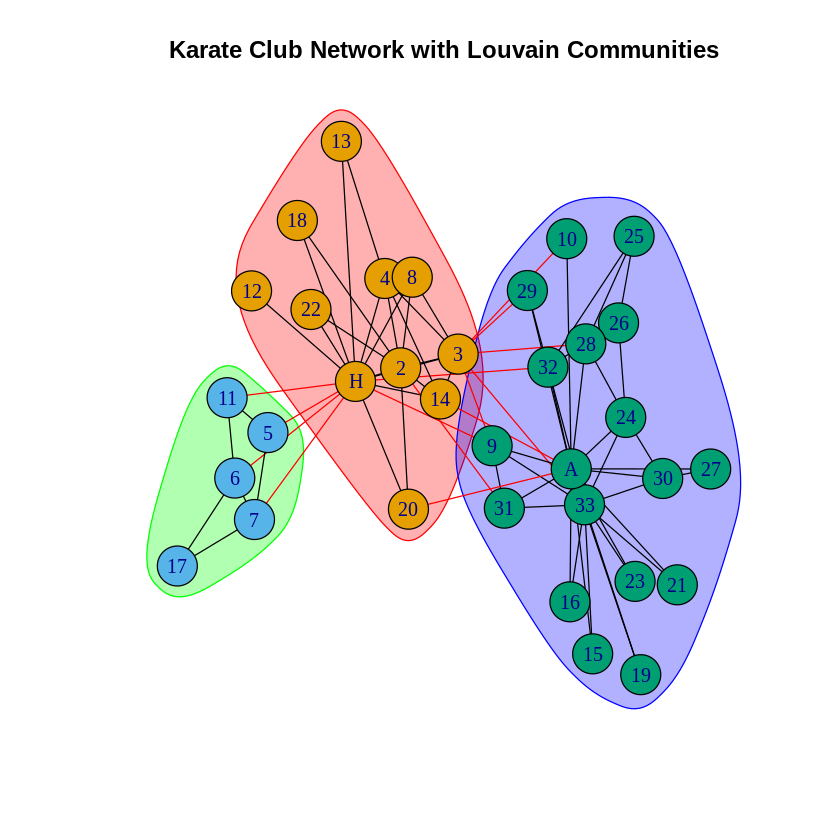

In [7]:
# Plot the network with communities
plot(community_louvain, karate, main="Karate Club Network with Louvain Communities")


In [8]:
# Calculate Degree Centrality
degree_centrality <- degree(karate)


In [9]:
# Calculate Betweenness Centrality
betweenness_centrality <- betweenness(karate)


In [10]:
# Calculate Closeness Centrality
closeness_centrality <- closeness(karate)


In [11]:
# Print top 5 nodes with highest degree centrality
print("Top 5 nodes by degree centrality:")
print(head(sort(degree_centrality, decreasing=TRUE), 5))


[1] "Top 5 nodes by degree centrality:"
  John A    Mr Hi Actor 33  Actor 3  Actor 2 
      17       16       12       10        9 


In [12]:
# Print top 5 nodes by betweenness centrality
print("Top 5 nodes by betweenness centrality:")
print(head(sort(betweenness_centrality, decreasing=TRUE), 5))


[1] "Top 5 nodes by betweenness centrality:"
    Mr Hi    John A  Actor 20  Actor 32  Actor 33 
250.15000 209.50000 127.06667  66.33333  38.13333 


In [13]:
# Print top 5 nodes by closeness centrality
print("Top 5 nodes by closeness centrality:")
print(head(sort(closeness_centrality, decreasing=TRUE), 5))


[1] "Top 5 nodes by closeness centrality:"
      Mr Hi      John A    Actor 20    Actor 32    Actor 13 
0.007692308 0.007633588 0.007518797 0.006329114 0.006211180 


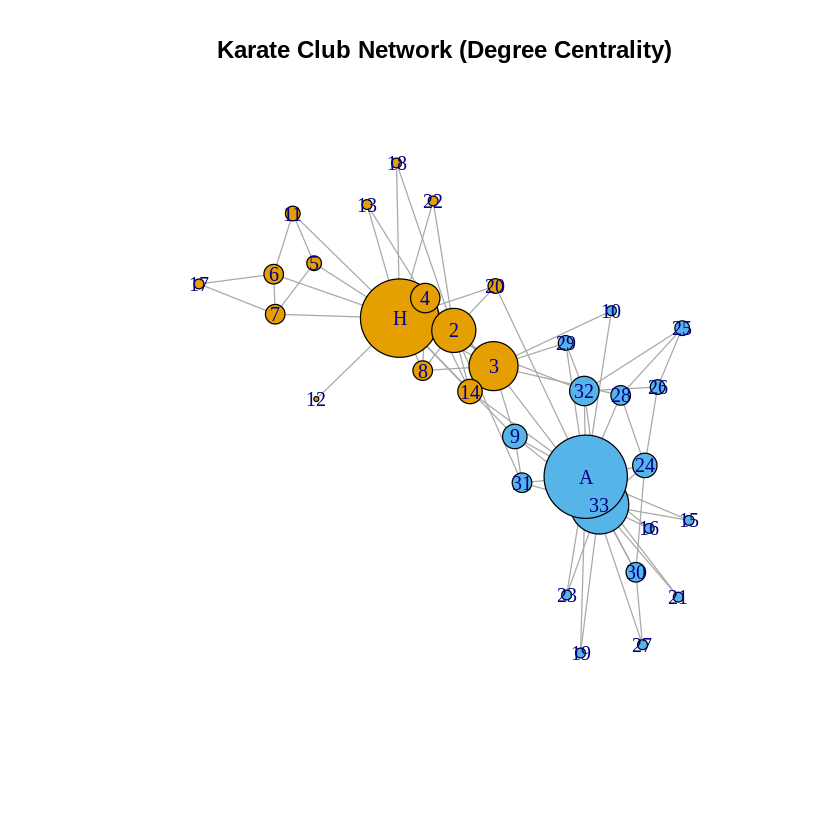

In [14]:
# Visualize the network with node size based on degree centrality
plot(karate, vertex.size=degree_centrality * 2, main="Karate Club Network (Degree Centrality)")


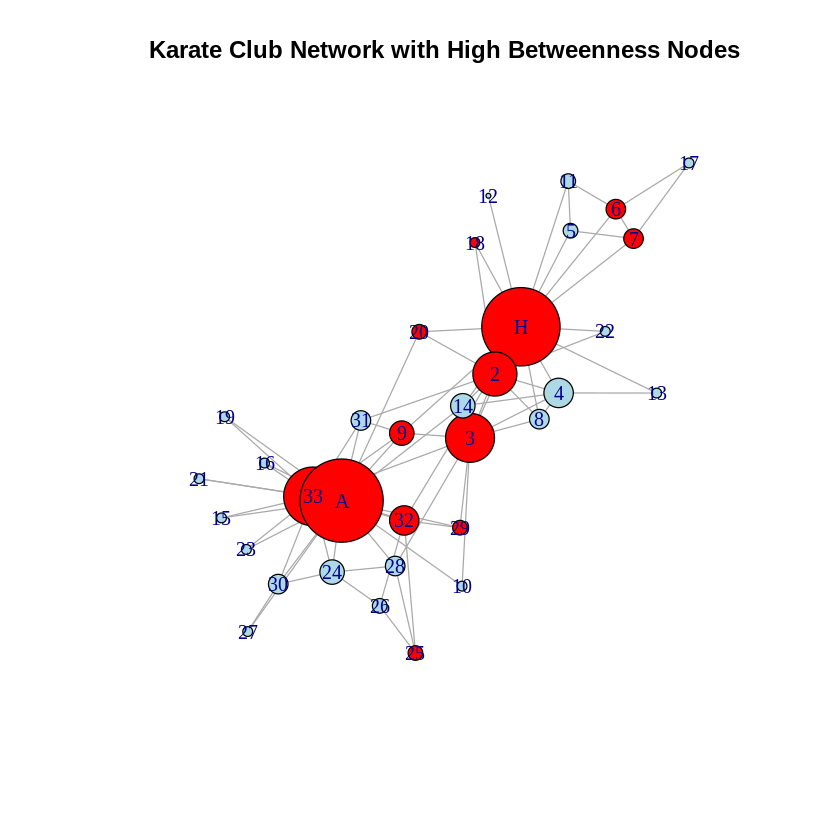

In [15]:
# Find nodes with high betweenness centrality
high_betweenness <- which(betweenness_centrality > 10)

# Plot the network, highlighting nodes with high betweenness centrality
plot(karate,
     vertex.size=degree_centrality * 2,
     vertex.color=ifelse(1:vcount(karate) %in% high_betweenness, "red", "lightblue"),
     main="Karate Club Network with High Betweenness Nodes")


In [16]:
# Detect cliques in the network
cliques <- cliques(karate)

# Print the largest cliques
print("Largest cliques in the network:")
print(cliques)


[1] "Largest cliques in the network:"
[[1]]
+ 1/34 vertex, named, from 4b458a1:
[1] John A

[[2]]
+ 1/34 vertex, named, from 4b458a1:
[1] Mr Hi

[[3]]
+ 1/34 vertex, named, from 4b458a1:
[1] Actor 26

[[4]]
+ 1/34 vertex, named, from 4b458a1:
[1] Actor 17

[[5]]
+ 1/34 vertex, named, from 4b458a1:
[1] Actor 33

[[6]]
+ 2/34 vertices, named, from 4b458a1:
[1] Actor 33 John A  

[[7]]
+ 1/34 vertex, named, from 4b458a1:
[1] Actor 2

[[8]]
+ 2/34 vertices, named, from 4b458a1:
[1] Mr Hi   Actor 2

[[9]]
+ 1/34 vertex, named, from 4b458a1:
[1] Actor 28

[[10]]
+ 2/34 vertices, named, from 4b458a1:
[1] Actor 28 John A  

[[11]]
+ 1/34 vertex, named, from 4b458a1:
[1] Actor 29

[[12]]
+ 2/34 vertices, named, from 4b458a1:
[1] Actor 29 John A  

[[13]]
+ 1/34 vertex, named, from 4b458a1:
[1] Actor 11

[[14]]
+ 2/34 vertices, named, from 4b458a1:
[1] Mr Hi    Actor 11

[[15]]
+ 1/34 vertex, named, from 4b458a1:
[1] Actor 7

[[16]]
+ 2/34 vertices, named, from 4b458a1:
[1] Actor 7  Actor 17

[[

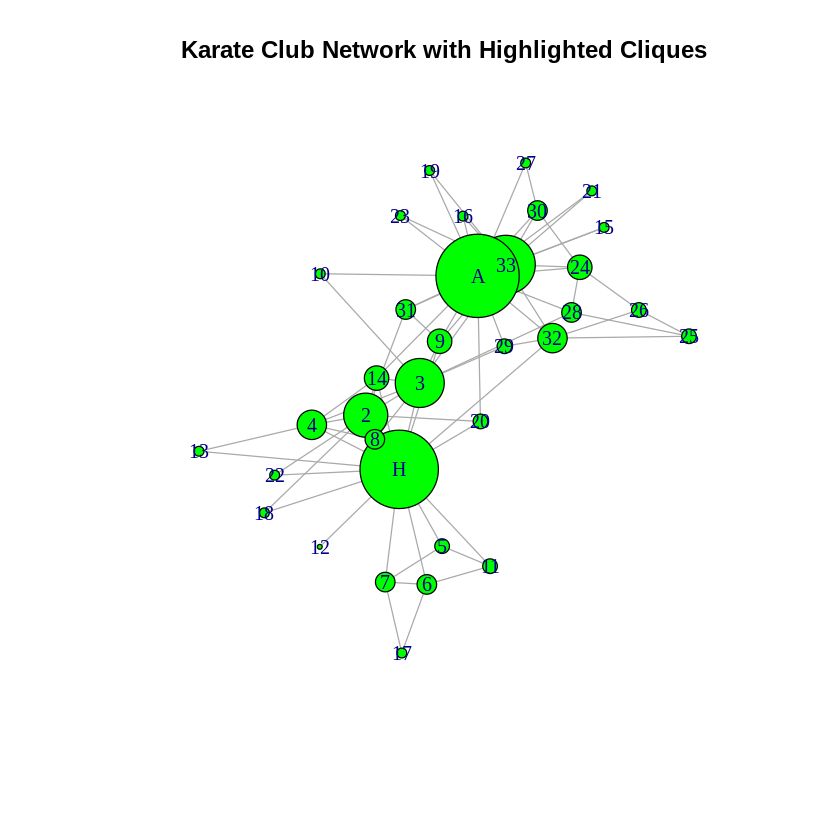

In [17]:
# Visualize the network, highlighting cliques
plot(karate,
     vertex.size=degree_centrality * 2,
     vertex.color=ifelse(1:vcount(karate) %in% unlist(cliques), "green", "lightblue"),
     main="Karate Club Network with Highlighted Cliques")


In [18]:
# Create a hypothetical attribute for joining years (for demonstration)
V(karate)$join_year <- sample(c(2005, 2015), vcount(karate), replace=TRUE)


In [19]:
# Subset the network for users who joined in 2005
# Use induced_subgraph instead of subgraph.vertices
karate_2005 <- induced_subgraph(karate, V(karate)[join_year == 2005])


In [20]:
# Subset the network for users who joined in 2015
# Use induced_subgraph instead of subgraph.vertices
karate_2015 <- induced_subgraph(karate, V(karate)[join_year == 2015])


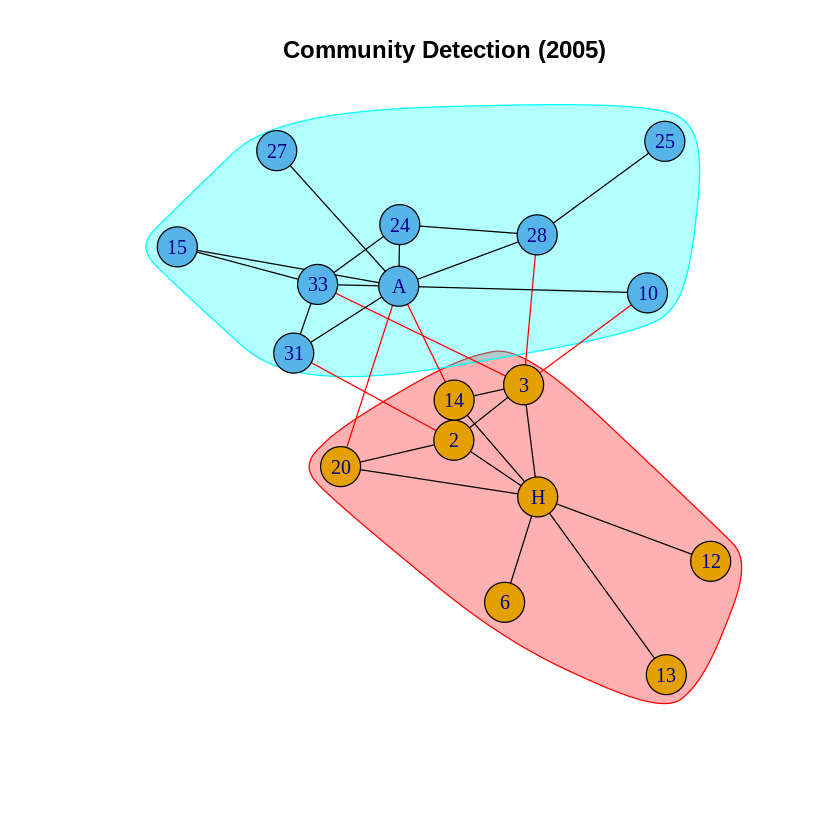

In [21]:
# Community detection for users who joined in 2005
community_2005 <- cluster_louvain(karate_2005)
plot(community_2005, karate_2005, main="Community Detection (2005)")


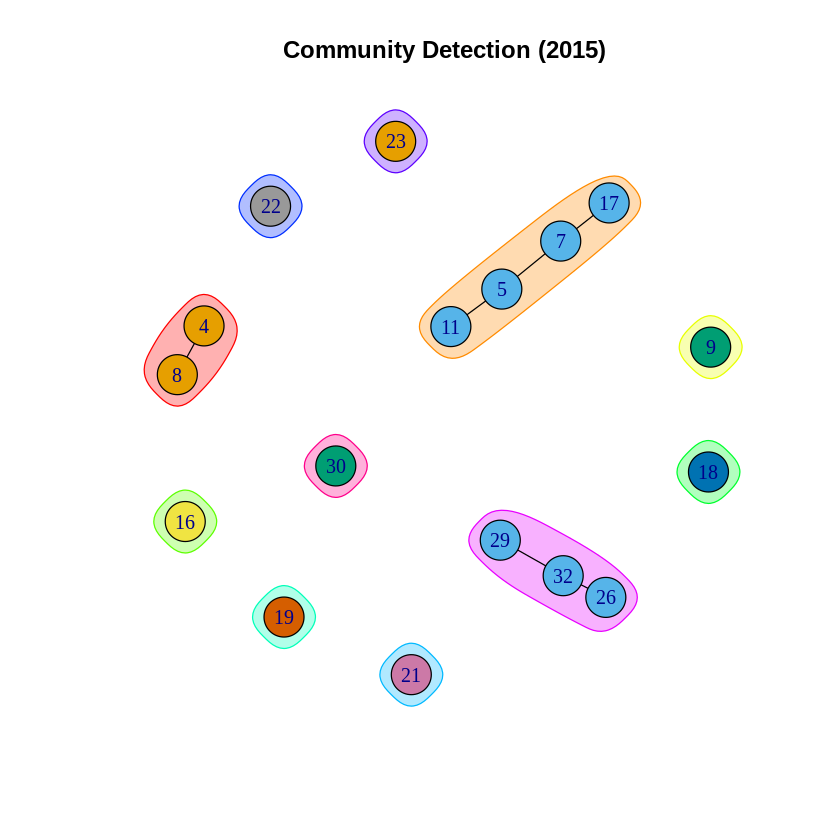

In [22]:
# Community detection for users who joined in 2015
community_2015 <- cluster_louvain(karate_2015)
plot(community_2015, karate_2015, main="Community Detection (2015)")
